In [82]:
#import pandas_profiling as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
#plt.style.use('default')

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.max_rows', 250)
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_columns', 30)

In [2]:
df = pd.read_csv('hr-data.csv')

In [3]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 11)

In [5]:
df['churn'].value_counts()

0    11428
1     3571
Name: churn, dtype: int64

In [7]:
df.rename(columns={'sales':'dept'}, inplace=True)

In [8]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df.groupby('Work_accident')['churn'].mean().reset_index()

,Work_accident,churn
0,0,0.265160
1,1,0.077916


In [31]:
features.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

In [32]:
features = df.drop(columns=['id', 'churn'])
num_columns = ['satisfaction_level',
               'last_evaluation',
               'average_montly_hours']
cat_columns = ['number_project',
               'time_spend_company',
               'Work_accident',
               'promotion_last_5years',
               'dept',
               'salary']

satisfaction_level


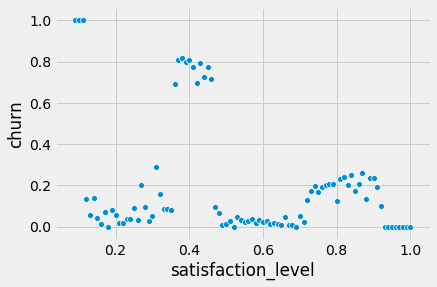

last_evaluation


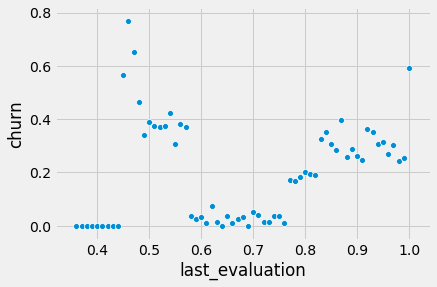

average_montly_hours


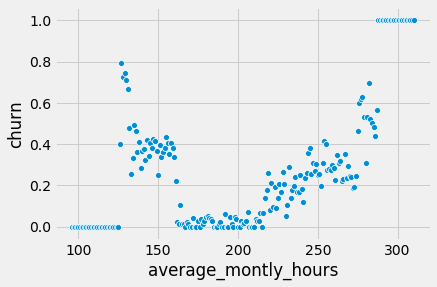

number_project


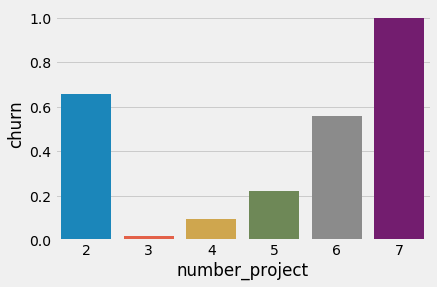

time_spend_company


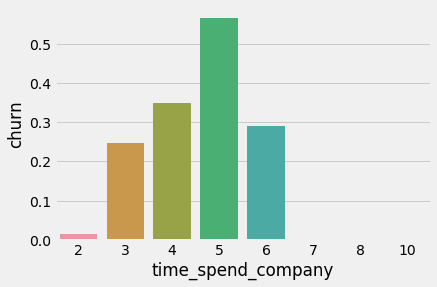

Work_accident


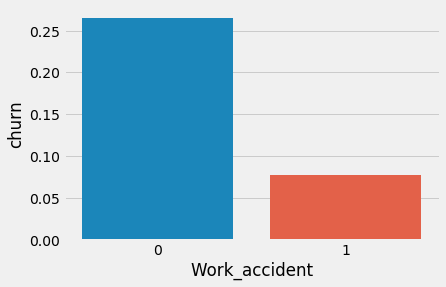

promotion_last_5years


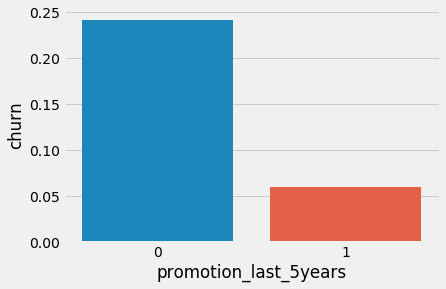

dept


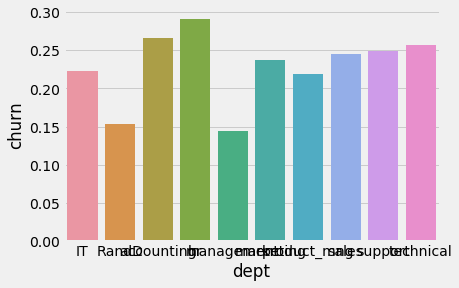

salary


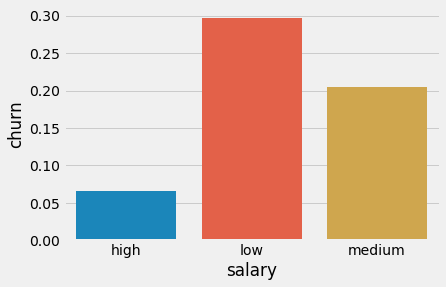

In [34]:
for col in features[num_columns]:
    print(col)
    sns.scatterplot(x=col,y='churn', data = df.groupby(col)['churn'].mean().reset_index())    
    plt.show()
    
for col in features[cat_columns]:
    print(col)
    sns.barplot(x=col,y='churn', data = df.groupby(col)['churn'].mean().reset_index())    
    plt.show()

- There is no trend between churn rate and satisfaction level
- There is no trend between churn rate and an employee's last evaluation
- There is no trend between churn rate and average monthly hours


- Employees with 7 projects all churn 
- After 5 years, employees are less likely to churn
- Employees with less work accidents have a higher churn rate
- Employees with less promotions in the past years have a higher churn rate
- R&D and management have a lower churn rate 

## Group numerical columns by clustering

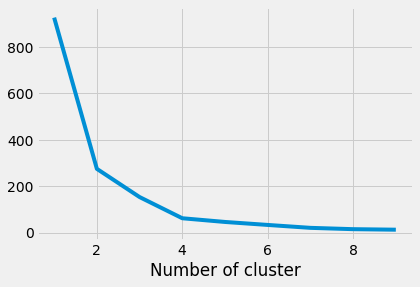

In [47]:
sse = {}
df_cluster = df[['satisfaction_level']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [50]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['satisfaction_level']])
df['sat_level_cluster'] = kmeans.predict(df[['satisfaction_level']])

In [55]:
df.groupby('sat_level_cluster')['satisfaction_level'].describe()

,count,mean,std,min,25%,50%,75%,max
sat_level_cluster,,,,,,,,
0,4441.0,0.887651,0.061710,0.79,0.83,0.89,0.94,1.00
1,4633.0,0.679361,0.064709,0.57,0.62,0.68,0.74,0.78
2,3984.0,0.452093,0.067452,0.31,0.40,0.45,0.51,0.56
3,1941.0,0.155183,0.061473,0.09,0.10,0.13,0.20,0.30


In [56]:
df['sat_level_cluster'] = df['sat_level_cluster'].replace({0:'very satisfied',
                                                           1:'satisfied',
                                                           2:'unsatisfied',
                                                           3:'very unsatisfied'})

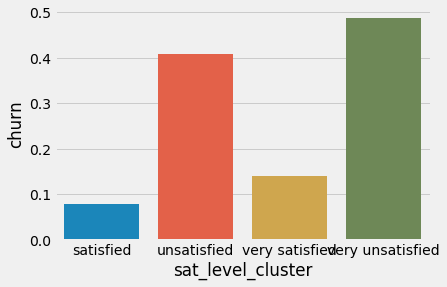

In [58]:
sns.barplot(x='sat_level_cluster',y='churn',data=df.groupby('sat_level_cluster')['churn'].mean().reset_index())

- unsatisfied and very unsatisfied employees have higher rate of churn 

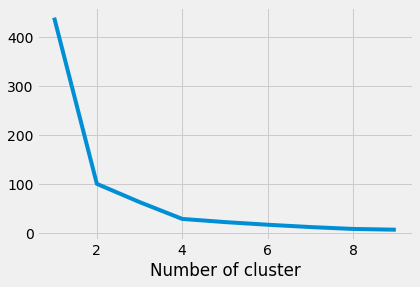

In [59]:
sse = {}
df_cluster = df[['last_evaluation']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [65]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['last_evaluation']])
df['last_eval_cluster'] = kmeans.predict(df[['last_evaluation']])

In [66]:
df.groupby('last_eval_cluster')['last_evaluation'].describe()

,count,mean,std,min,25%,50%,75%,max
last_eval_cluster,,,,,,,,
0,3653.0,0.808596,0.041057,0.74,0.77,0.81,0.85,0.87
1,4487.0,0.508861,0.050042,0.36,0.48,0.51,0.55,0.58
2,3519.0,0.939471,0.037461,0.88,0.91,0.94,0.97,1.00
3,3340.0,0.658009,0.043390,0.59,0.62,0.66,0.70,0.73


In [69]:
df['last_eval_cluster'] = df['last_eval_cluster'].replace({0:'high performance',
                                                           1:'low performance',
                                                           2:'very high performance',
                                                           3:'average performance'})

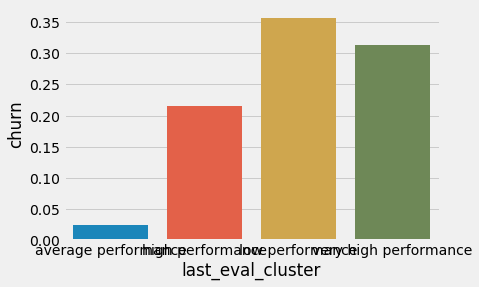

In [71]:
sns.barplot(x='last_eval_cluster',y='churn',data=df.groupby('last_eval_cluster')['churn'].mean().reset_index())

- low performance employees have the highest rate of churn
- interesting that average performance have a 2.5% rate of churn, meaning they rarely churn 

In [72]:
df.groupby('last_eval_cluster')['churn'].mean()

last_eval_cluster
average performance      0.024551
high performance         0.214892
low performance          0.357031
very high performance    0.313157
Name: churn, dtype: float64

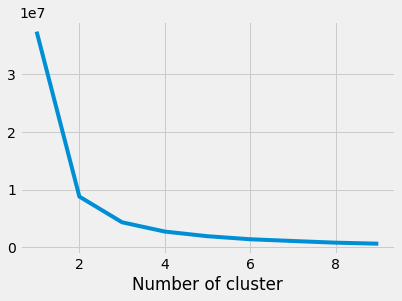

In [73]:
sse = {}
df_cluster = df[['average_montly_hours']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of cluster')
plt.show()

In [74]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['average_montly_hours']])
df['avg_month_hr_cluster'] = kmeans.predict(df[['average_montly_hours']])

In [76]:
df.groupby('avg_month_hr_cluster')['average_montly_hours'].describe()

,count,mean,std,min,25%,50%,75%,max
avg_month_hr_cluster,,,,,,,,
0,5104.0,258.326607,17.709606,231.0,244.0,257.0,269.0,310.0
1,5500.0,146.582364,16.793536,96.0,136.0,148.0,159.0,174.0
2,4395.0,202.696701,16.424076,175.0,188.0,203.0,217.0,230.0


In [77]:
df['avg_month_hr_cluster'] = df['avg_month_hr_cluster'].replace({0:'high',
                                                                 1:'low',
                                                                 2:'medium'})

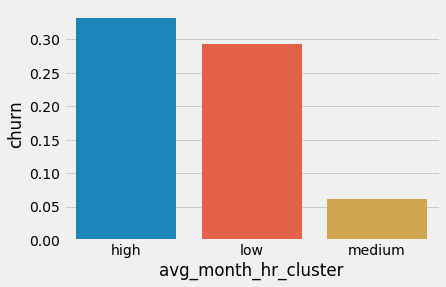

In [78]:
sns.barplot(x='avg_month_hr_cluster',y='churn',data=df.groupby('avg_month_hr_cluster')['churn'].mean().reset_index())

- Employees who are overworked or don't work enough hours have a higher rate of churn

In [79]:
df.head()

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary,sat_level_cluster,last_eval_cluster,avg_month_hr_cluster
0,0,0.38,0.53,2,157,3,0,1,0,sales,low,unsatisfied,low performance,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium,very satisfied,high performance,high
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium,very unsatisfied,very high performance,high
3,3,0.72,0.87,5,223,5,0,1,0,sales,low,satisfied,high performance,medium
4,4,0.37,0.52,2,159,3,0,1,0,sales,low,unsatisfied,low performance,low


We've made 3 new features.

In [87]:
X = df.drop(columns=['id',
                     'Work_accident', 
                     'churn', 
                     'promotion_last_5years', 
                     'dept', 
                     'salary', 
                     'sat_level_cluster',
                     'last_eval_cluster',
                     'avg_month_hr_cluster'])

In [89]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


In [90]:
poly = PolynomialFeatures(2, interaction_only=True)

In [102]:
arr_poly = poly.fit_transform(X)

In [103]:
df_poly = pd.DataFrame(arr_poly)

In [104]:
df_poly.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.38,0.53,2.0,157.0,3.0,0.2014,0.76,59.66,1.14,1.06,83.21,1.59,314.0,6.0,471.0
1,1.0,0.80,0.86,5.0,262.0,6.0,0.6880,4.00,209.60,4.80,4.30,225.32,5.16,1310.0,30.0,1572.0
2,1.0,0.11,0.88,7.0,272.0,4.0,0.0968,0.77,29.92,0.44,6.16,239.36,3.52,1904.0,28.0,1088.0
3,1.0,0.72,0.87,5.0,223.0,5.0,0.6264,3.60,160.56,3.60,4.35,194.01,4.35,1115.0,25.0,1115.0
4,1.0,0.37,0.52,2.0,159.0,3.0,0.1924,0.74,58.83,1.11,1.04,82.68,1.56,318.0,6.0,477.0


In [96]:
create_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(X,p) for p in poly.powers_ ]]

In [105]:
df_poly.columns = create_feature_names

In [115]:
df_poly.columns

Index(['', 'satisfaction_level^1', 'last_evaluation^1', 'number_project^1',
       'average_montly_hours^1', 'time_spend_company^1',
       'satisfaction_level^1xlast_evaluation^1',
       'satisfaction_level^1xnumber_project^1',
       'satisfaction_level^1xaverage_montly_hours^1',
       'satisfaction_level^1xtime_spend_company^1',
       'last_evaluation^1xnumber_project^1',
       'last_evaluation^1xaverage_montly_hours^1',
       'last_evaluation^1xtime_spend_company^1',
       'number_project^1xaverage_montly_hours^1',
       'number_project^1xtime_spend_company^1',
       'average_montly_hours^1xtime_spend_company^1'],
      dtype='object')

In [123]:
df_poly = df_poly.iloc[:,6:] #just the interaction terms

In [125]:
df_poly['id'] = df['id']

In [126]:
df_for_preprocessing = df.merge(df_poly) #merges on id

In [127]:
df_for_preprocessing.head() 

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,dept,salary,sat_level_cluster,last_eval_cluster,avg_month_hr_cluster,satisfaction_level^1xlast_evaluation^1,satisfaction_level^1xnumber_project^1,satisfaction_level^1xaverage_montly_hours^1,satisfaction_level^1xtime_spend_company^1,last_evaluation^1xnumber_project^1,last_evaluation^1xaverage_montly_hours^1,last_evaluation^1xtime_spend_company^1,number_project^1xaverage_montly_hours^1,number_project^1xtime_spend_company^1,average_montly_hours^1xtime_spend_company^1
0,0,0.38,0.53,2,157,3,0,1,0,sales,low,unsatisfied,low performance,low,0.2014,0.76,59.66,1.14,1.06,83.21,1.59,314.0,6.0,471.0
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium,very satisfied,high performance,high,0.6880,4.00,209.60,4.80,4.30,225.32,5.16,1310.0,30.0,1572.0
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium,very unsatisfied,very high performance,high,0.0968,0.77,29.92,0.44,6.16,239.36,3.52,1904.0,28.0,1088.0
3,3,0.72,0.87,5,223,5,0,1,0,sales,low,satisfied,high performance,medium,0.6264,3.60,160.56,3.60,4.35,194.01,4.35,1115.0,25.0,1115.0
4,4,0.37,0.52,2,159,3,0,1,0,sales,low,unsatisfied,low performance,low,0.1924,0.74,58.83,1.11,1.04,82.68,1.56,318.0,6.0,477.0


In [128]:
df_for_preprocessing.shape

(14999, 24)

We've made 13 new feautures. Let's pre-process this data in another notebook. Don't forget to standardize the numerical features.

In [81]:
df.to_csv('df_for_preprocessing.csv', index=False)